In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# import nltk
# nltk.download('all')

In [3]:
import pandas as pd
import sklearn
import numpy as np
import re
import nltk

import matplotlib.pyplot as plt
from matplotlib import style

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as esw
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize
from nltk import pos_tag
import string

# allow display of multiple outputs by running one code cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"



C:\Users\fatma\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\fatma\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\fatma\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [4]:
data=pd.read_csv('Data/final_data_en.csv', index_col='id')
data=data[['text','class']]
data

,text,class
id,,
1039,RT @maideeeni: I want to say a very big thank ...,anxiety
1682,@AisYalcaE @clyrhck Done! I just need 320! Tha...,lonely
5275,@SAD_istfied I'm gonna cry /pos,stress
6069,RT @JoshOfficial___: I need a consistent fuck ...,anxiety
6087,RT @mikegolicjr: glad we're finally talking ab...,normal
...,...,...
7813,Im nervous ash to fly though,anxiety
1305,64E7B6DA :Battle ID\nI need backup!\nLvl 120 G...,lonely
5192,SNOW MUCH FUN writing about our snow days in @...,anxiety


In [5]:
import numpy as np
import tensorflow as tf
# train=data.loc[ :33802]
# test=data.loc[33803: ]
data=data.sample(frac=1)


data

,text,class
id,,
6102,RT @EvanCooney: when one of my mutuals makes a...,normal
652,RT @Nash_be_INNIT: Ok so I just need people to...,anxiety
3324,oml i have a huge headache i need help to clea...,anxiety
3845,Okay so Im v need to bring a #fashionblogger b...,anxiety
2960,RT @sanjeev_6120: @CyberBoo_ The India ban is ...,anxiety
...,...,...
5734,RT @nprpolitics: Former President Trump's spee...,normal
8442,i need me a wig like that https://t.co/rWejlel2jx,lonely
7940,@JennyENicholson I remember that episode. It m...,anxiety


In [6]:
data.dropna(inplace=True)



In [7]:
data.isnull().sum()

text     0
class    0
dtype: int64

In [8]:
data

,text,class
id,,
6102,RT @EvanCooney: when one of my mutuals makes a...,normal
652,RT @Nash_be_INNIT: Ok so I just need people to...,anxiety
3324,oml i have a huge headache i need help to clea...,anxiety
3845,Okay so Im v need to bring a #fashionblogger b...,anxiety
2960,RT @sanjeev_6120: @CyberBoo_ The India ban is ...,anxiety
...,...,...
5734,RT @nprpolitics: Former President Trump's spee...,normal
8442,i need me a wig like that https://t.co/rWejlel2jx,lonely
7940,@JennyENicholson I remember that episode. It m...,anxiety


In [9]:
cachedStopWords = list(esw)
lemmatizer=WordNetLemmatizer()
#ps = PorterStemmer()

def lemmatize_article(sentence):
    sentence = word_tokenize(sentence)
    res = ''
    for word, tag in pos_tag(sentence):
        wntag = tag[0].lower()
        wntag = wntag if wntag in ['a', 'r', 'n', 'v'] else None
        word = lemmatizer.lemmatize(word, wntag) if wntag else word
        res += word + ' '
    return res


def remove_stop_words(sentence):
    return ' '.join([word for word in sentence.split() if word not in cachedStopWords])
    
def remove_short(sentence):
    return ' '.join([word for word in sentence.split() if len(word) >= 3])
    
def remove_digits(sentence):
    return ' '.join([i for i in sentence.split() if not i.isdigit()])
    
def preprocess(all_texts):
    all_texts = list(map(lambda x: x.lower(), all_texts))
    all_texts = list(map(lambda x: x.translate(str.maketrans('', '', string.punctuation)), all_texts))
    all_texts = list(map(lambda x: lemmatize_article(x), all_texts))
    all_texts = list(map(lambda x: x.strip(), all_texts))
    all_texts = list(map(lambda x: remove_stop_words(x), all_texts))
    all_texts = list(map(lambda x: remove_short(x), all_texts))
    all_texts = list(map(lambda x: remove_digits(x), all_texts))
    return all_texts

In [10]:
data['text'] = data['text'].str.replace(r'\s*@\w+', '', regex = True)
data['text'] = data['text'].str.replace(r'\s*\B@\w+', '', regex = True)
data['text'] = data['text'].str.replace(r'\s*@\S+', '', regex = True)
data['text'] = data['text'].str.replace(r'\s*@\S+\b', '', regex = True)
data['text'] = data['text'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
data


,text,class
id,,
6102,RT: when one of my mutuals makes a LOTR Thread,normal
652,RT: Ok so I just need people to rt this becaus...,anxiety
3324,oml i have a huge headache i need help to clea...,anxiety
3845,Okay so Im v need to bring a #fashionblogger b...,anxiety
2960,RT: The India ban is only getting more and mor...,anxiety
...,...,...
5734,RT: Former President Trump's speech on January...,normal
8442,i need me a wig like that,lonely
7940,I remember that episode. It made me feel so t...,anxiety


In [11]:
data['text'] = preprocess(data['text'])
data

,text,class
id,,
6102,mutuals make lotr thread,normal
652,just need people just shit need help actually ...,anxiety
3324,oml huge headache need help clean hamster verg...,anxiety
3845,okay need bring fashionblogger ive just post t...,anxiety
2960,india ban feel like lose battle really bad yall,anxiety
...,...,...
5734,president trump speech january just violent in...,normal
8442,need wig like,lonely
7940,remember episode make feel trapped isolate wri...,anxiety


In [12]:
data = pd.DataFrame(data)
data.head()

,text,class
id,,
6102,mutuals make lotr thread,normal
652,just need people just shit need help actually ...,anxiety
3324,oml huge headache need help clean hamster verg...,anxiety
3845,okay need bring fashionblogger ive just post t...,anxiety
2960,india ban feel like lose battle really bad yall,anxiety


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier

In [14]:
data = data[(data["text"] != "") & (data["text"] != "null")]


In [15]:
data.shape

(39555, 2)

In [16]:
data['class'].shape

(39555,)

In [17]:
X = data['text'].values
Y = data['class'].values


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
td = TfidfVectorizer(max_features = 4500)
X = td.fit_transform(X).toarray()

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3,
                                                    random_state = 0)

In [20]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Classification metrics
from sklearn.metrics import accuracy_score, classification_report
classification_report = classification_report(y_test, y_pred)

print('\n Accuracy: ', accuracy_score(y_test, y_pred))
print('\nClassification Report')
print('======================================================')
print('\n', classification_report)

MultinomialNB()


 Accuracy:  0.6389989045251537

Classification Report

               precision    recall  f1-score   support

     anxiety       0.59      0.70      0.64      3798
      lonely       0.57      0.48      0.52      2550
      normal       0.60      0.56      0.58      2950
      stress       0.85      0.78      0.81      2569

    accuracy                           0.64     11867
   macro avg       0.65      0.63      0.64     11867
weighted avg       0.64      0.64      0.64     11867



### Hyperparameters tuning for NB

Fitting 15 folds for each of 8 candidates, totalling 120 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=999),
             estimator=MultinomialNB(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.1, 1, 10, 100,
                                   1000]},
             scoring='accuracy', verbose=1)

{'alpha': 1}

0.6391215935330178

Text(0.5, 0, 'alpha')

Text(0, 0.5, 'Mean CV Score')

Text(0.5, 1.0, 'NB Performance Comparison')

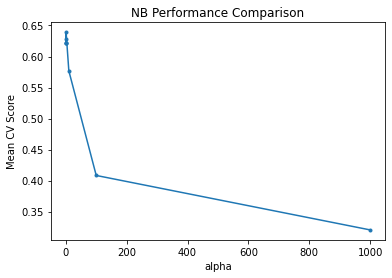

accuracy_score on test dataset :  0.6389989045251537

 Accuracy:  0.6389989045251537

Classification Report

               precision    recall  f1-score   support

     anxiety       0.59      0.70      0.64      3798
      lonely       0.57      0.48      0.52      2550
      normal       0.60      0.56      0.58      2950
      stress       0.85      0.78      0.81      2569

    accuracy                           0.64     11867
   macro avg       0.65      0.63      0.64     11867
weighted avg       0.64      0.64      0.64     11867



In [34]:
model = MultinomialNB()
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

from sklearn.preprocessing import PowerTransformer
params_NB = {'alpha': [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]}

gs_NB = GridSearchCV(estimator=model, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

# Data_transformed = PowerTransformer().fit_transform(X_test)

gs_NB.fit(X_train, y_train)
gs_NB.best_params_
gs_NB.best_score_

results_NB = pd.DataFrame(gs_NB.cv_results_['params'])
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']


plt.plot(results_NB['alpha'], results_NB['test_score'], marker = '.')    
plt.xlabel('alpha')
plt.ylabel("Mean CV Score")
plt.title("NB Performance Comparison")
plt.show()

# predict the target on the test dataset
predict_test = gs_NB.predict(X_test)

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)


# classification_report = classification_report(y_test, predict_test)

print('\n Accuracy: ', accuracy_score(y_test, predict_test))
print('\nClassification Report')
print('======================================================')
print('\n', classification_report)

In [32]:
# predict_test

array(['normal', 'lonely', 'lonely', ..., 'normal', 'stress', 'anxiety'],
      dtype='<U7')

In [33]:
# y_test

array(['lonely', 'lonely', 'anxiety', ..., 'normal', 'stress', 'anxiety'],
      dtype=object)

In [35]:
import re
classifiers = [
    LogisticRegression(solver="sag", random_state=42),
    LinearSVC(random_state=42),
    RandomForestClassifier(random_state=1),
    XGBClassifier(random_state=42),
    MLPClassifier(
        random_state=42,
        solver="adam",
        hidden_layer_sizes=(500, 500, 400),
        activation="relu",
        early_stopping=True,
        n_iter_no_change=1,
    ),
]
# get names of the objects in list (too lazy for c&p...)
names = [re.match(r"[^\(]+", name.__str__())[0] for name in classifiers]
print(f"Classifiers to test: {names}")

Classifiers to test: ['LogisticRegression', 'LinearSVC', 'RandomForestClassifier', 'XGBClassifier', 'MLPClassifier']


In [36]:
%%time
import pickle
import sklearn

# test all classifiers and save pred. results on test data
results = {}
for name, clf in zip(names, classifiers):
    print(f"Training classifier: {name}")
    clf.fit(X_train, y_train)
    prediction = clf.predict(X_test)
    report = sklearn.metrics.classification_report(y_test, prediction)
    results[name] = report

Training classifier: LogisticRegression
Training classifier: LinearSVC
Training classifier: RandomForestClassifier
Training classifier: XGBClassifier


C:\Users\fatma\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:20:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training classifier: MLPClassifier
Wall time: 16min 16s


for k, v in results.items():
    print(f"Results for {k}:")
    print(f"{v}\n")

### hyperparameters for logistic regression/

In [38]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.961333 using {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.959000 (0.017954) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.958667 (0.018209) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.958333 (0.018273) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.959667 (0.016829) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.959333 (0.017499) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.958333 (0.018273) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.959333 (0.016720) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.960333 (0.016224) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.959667 (0.018345) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.959667 (0.016630) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.959667 (0.016630) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.959667 (0.016829) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.961333 (0.016069) wi